<div class="alert alert-danger">  
<h1><strong>Tesla stock price prediction using LLM</strong></h1>
</div>


<div>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbl5kRMMFfje1wsUDDq9Kwz4VS0WOzEaPBiQ&s" width="750"/>
</div>

**Project Overview:**

This project involves using a Long Short-Term Memory (LSTM) neural network to predict Tesla stock prices. The LSTM model is trained on historical stock data to forecast future prices based on past trends.

Dataset:

The dataset, TSLA2.csv, contains historical stock data with the following columns:

* Date: The date of the stock data.
* Open: The opening price of the stock.
* High: The highest price of the stock.
* Low: The lowest price of the stock.
* Close: The closing price of the stock.
* Adj Close: The adjusted closing price of the stock.
* Volume: The trading volume.

Model Architecture:

The LSTM model is constructed using TensorFlow and Keras libraries and consists of the following layers:

Two LSTM Layers: Each with 50 units to capture temporal dependencies in the data.
Dropout Layers: Applied to prevent overfitting by randomly setting a fraction of input units to 0 during training.
Dense Output Layer: With one unit to predict the stock price

#  Importing Libraries

In [1]:
%pip install seaborn scikit-learn
%pip install tensorflow
%pip install keras


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# EDA

In [2]:
data = pd.read_csv(r'C:/Users/vijay/OneDrive/Desktop/Nasdaq analyser/tf-env/Include/tesla.csv')
df=data


In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


# **Explanation of the EDA Steps:**
Loading the Dataset: Read the CSV file TSLA.csv using pandas and display the first few rows to understand the structure of the data.
Summary Statistics: Generate summary statistics to understand the data distribution for each feature.
Checking for Missing Values: Identify any missing data that might need cleaning.

Data Visualization:
* Line Plot of Closing Prices: Visualize the trend of Tesla's closing stock prices over time.
* Histogram of Closing Prices: Analyze the distribution of the closing prices.
* Correlation Heatmap: Understand the correlations between different stock features.
* Scatter Plot (Open vs. Close Prices): Explore the relationship between opening and closing prices.
* Histogram of Daily Returns: Examine the daily returns to understand stock volatility.
* Moving Averages: Plot 50-day and 200-day moving averages along with closing prices to identify trends.


First few rows of the dataset:
         Date       Open   High        Low      Close  Adj Close    Volume
0  29-06-2010  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  30-06-2010  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  01-07-2010  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  02-07-2010  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  06-07-2010  20.000000  20.00  15.830000  16.110001  16.110001   6866900

Summary statistics of the dataset:
              Open         High          Low        Close    Adj Close  \
count  2193.000000  2193.000000  2193.000000  2193.000000  2193.000000   
mean    175.652882   178.710262   172.412075   175.648555   175.648555   
std     115.580903   117.370092   113.654794   115.580771   115.580771   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      33.110001    33.910000    32.459999    33.160000    33.160000   
50%     204.990005   208.160004   201.6

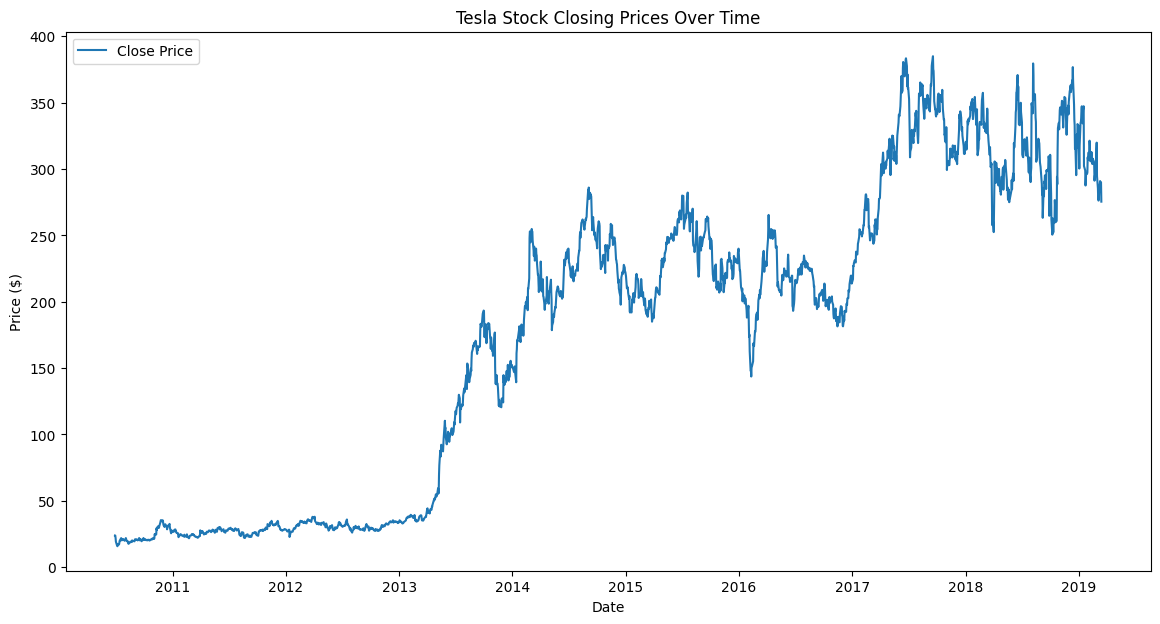

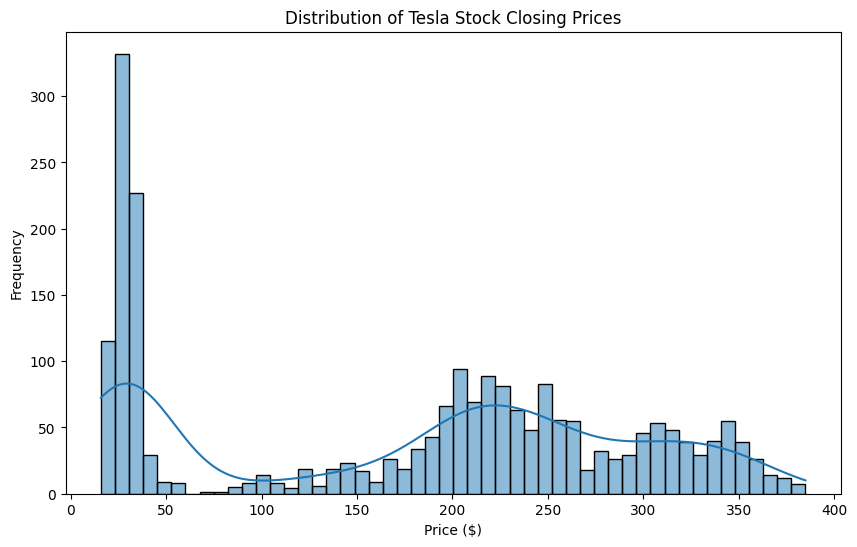

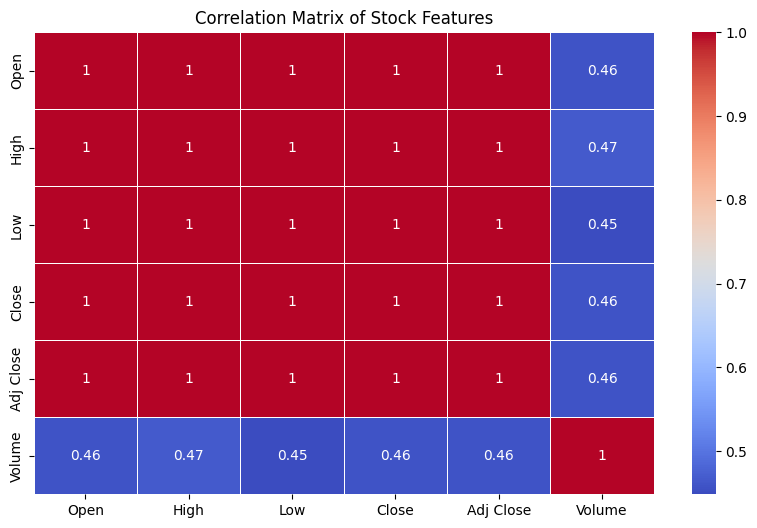

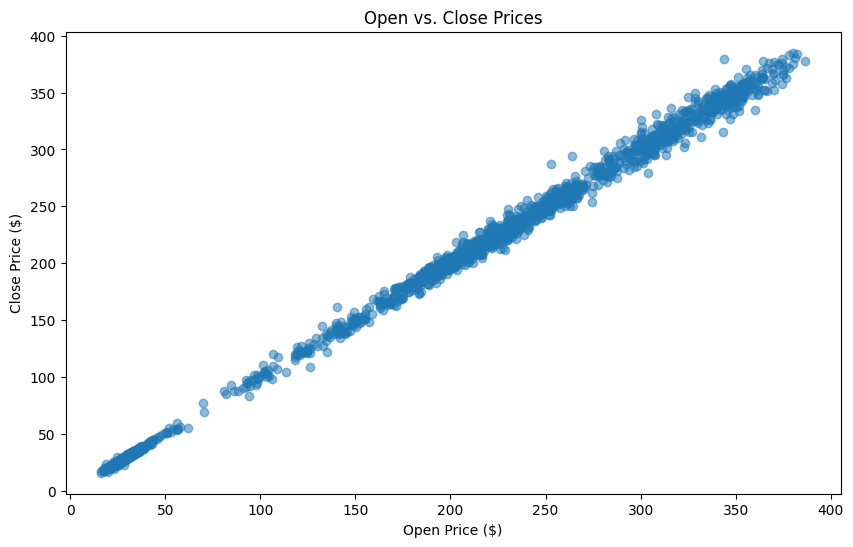

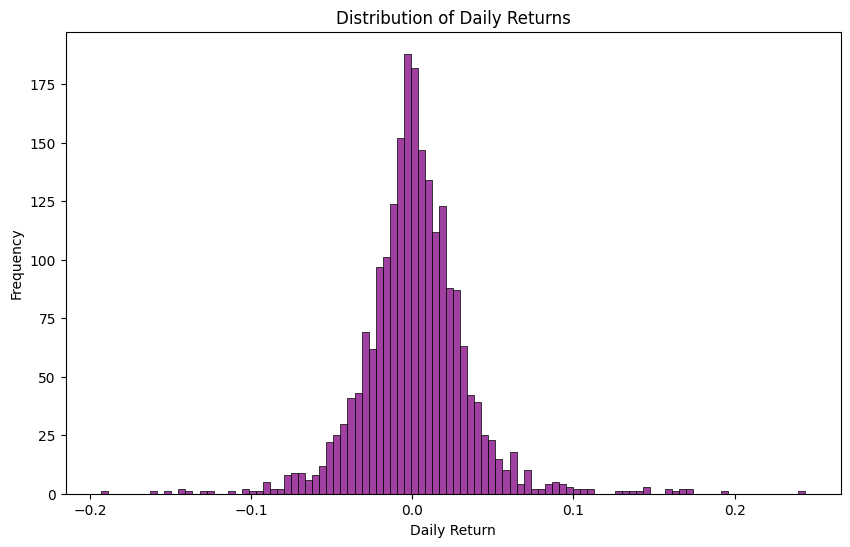

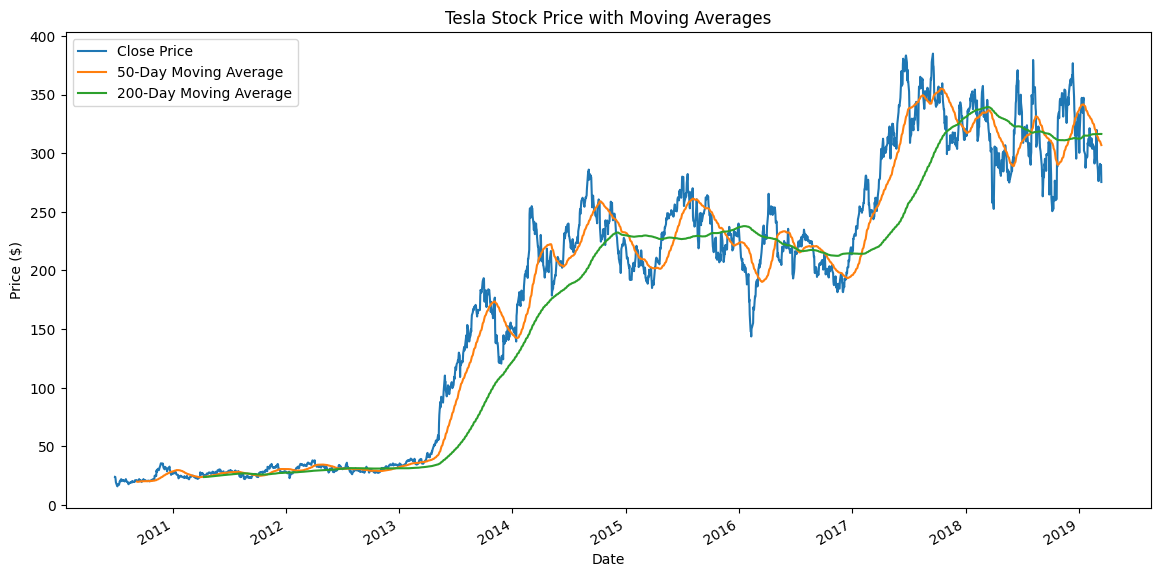

In [4]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Tesla Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Plot the distribution of the closing prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Tesla Stock Closing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Features')
plt.show()

# Visualize the relationship between Open and Close prices
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.title('Open vs. Close Prices')
plt.xlabel('Open Price ($)')
plt.ylabel('Close Price ($)')
plt.show()

# Visualize daily returns
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Plot the moving average of the closing prices
plt.figure(figsize=(14, 7))
df['Close'].plot(label='Close Price')
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['MA50'].plot(label='50-Day Moving Average')
df['MA200'].plot(label='200-Day Moving Average')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


# Data Preprocessing

In [5]:
close_price = data['Close'].values


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])


In [7]:
# Creating sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
       # Create a sequence of data from day 'i' to 'i + seq_length - 1'
        X.append(data.iloc[i:i + seq_length].values)

        # The target value is the stock price for the day immediately after the sequence
        y.append(data.iloc[i + seq_length]['Close'])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 25

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

**Splitting the data into training and testing sets**

In [8]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.85) 
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
print(y_test.shape)

(326,)


In [10]:
print(X_train.shape)

(1842, 25, 6)


# Building the LSTM model

In [11]:
!pip install tensorflow
import tensorflow as tf

Defaulting to user installation because normal site-packages is not writeable


In [12]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install keras-models

Note: you may need to restart the kernel to use updated packages.


In [14]:
!python.exe -m pip install --upgrade pip

In [4]:
%pip install tensorflow
%pip install keras-models

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=True, input_shape=(60, 6)))
model.add(Dropout(0.3))

# Second LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer without return_sequences
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected Dense layer
model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model with Adam optimizer and mean squared error loss
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Set up early stopping and model checkpoint with .keras format
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Display the model summary
model.summary()

# Fit the model to the training data
# Assume X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, model_checkpoint])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        42,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,701 (604.30 KB)

 Trainable params: 154,701 (604.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0317 - val_loss: 0.0128
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0074 - val_loss: 0.0066
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0076 - val_loss: 0.0267
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0060 - val_loss: 0.0077
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0052 - val_loss: 0.0039
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0051 - val_loss: 0.0140
Epoch 9/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0039 - val_loss: 0.0098
Epoch 10/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0037 - val_loss: 0.0080
Epoch 11/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0037 - val_loss: 0.0084
Epoch 12/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.

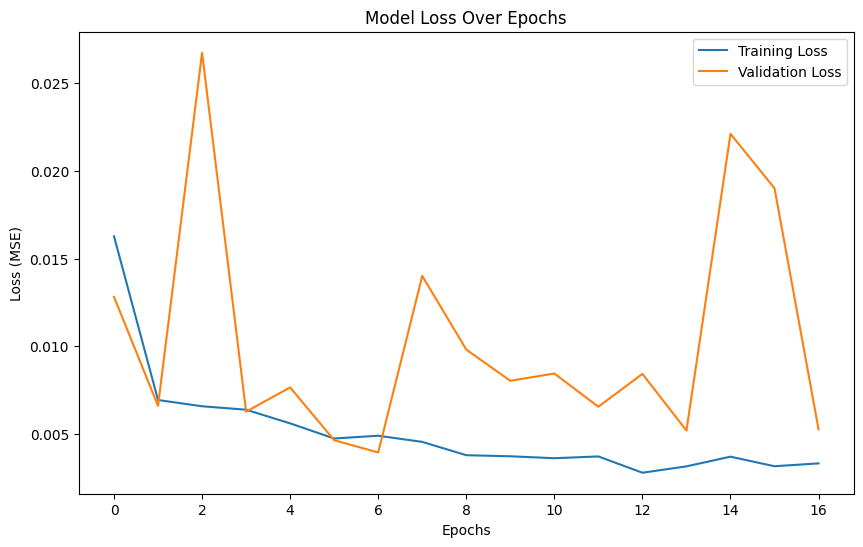

Final Training Loss (MSE): 0.0033
Final Validation Loss (MSE): 0.0053
Final Training RMSE: 0.0576
Final Validation RMSE: 0.0726
Test Loss (MSE): 0.0051
Test RMSE: 0.0717


In [16]:

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Print the final training and validation loss
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
print(f'Final Training Loss (MSE): {train_loss:.4f}')
print(f'Final Validation Loss (MSE): {val_loss:.4f}')

# Calculate RMSE on the training and validation sets
train_rmse = np.sqrt(train_loss)
val_rmse = np.sqrt(val_loss)
print(f'Final Training RMSE: {train_rmse:.4f}')
print(f'Final Validation RMSE: {val_rmse:.4f}')

# If you have test data, evaluate the model on the test set
# Assume X_test and y_test are already defined and preprocessed
test_loss = model.evaluate(X_test, y_test, verbose=0)
test_rmse = np.sqrt(test_loss)
print(f'Test Loss (MSE): {test_loss:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


Visualizing the Results

<div>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjuLZrFj4B7AREcb3OtwYpIYFayNptHW9DNg&s" width="250"/>
</div>

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


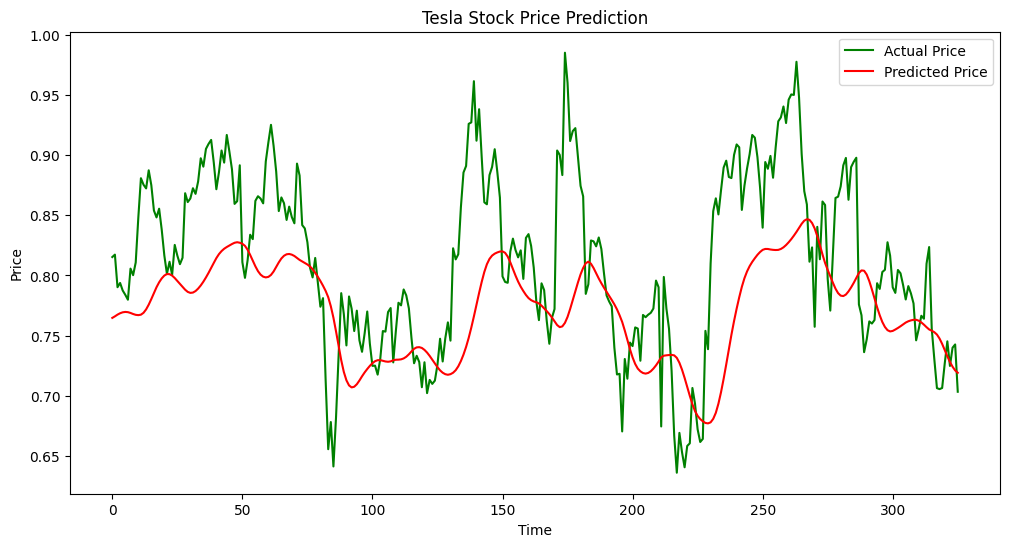

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='green')
plt.plot(model.predict(X_test), label='Predicted Price', color='red')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()